In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers.shape

(200, 4)

In [5]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

#### Let's fix the data type for SignupDate column

In [6]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'],format='%Y-%m-%d')

In [7]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [8]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
customers.describe()

C:\Users\saswa\AppData\Local\Temp\ipykernel_2156\1041809761.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customers.describe()


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11 00:00:00
freq,1,1,59,3
first,NaN,NaN,NaN,2022-01-22 00:00:00
last,NaN,NaN,NaN,2024-12-28 00:00:00


In [10]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
products.shape

(100, 4)

In [12]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [13]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [14]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [15]:
transactions.shape

(1000, 7)

In [16]:
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

##### Let's fix TransactionDate column 

In [17]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [18]:
transactions.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

In [19]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


##### Now that we know about the data , let's take a bird eye view of the data by performing joins

In [20]:
result = pd.merge(left=pd.merge(left=transactions,right=customers,on='CustomerID',how='inner'),right=products,on='ProductID',how='inner')

In [21]:
result.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [22]:
result.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
999,T00157,C0169,P044,2024-11-09 09:07:36,2,37.64,18.82,Jennifer Shaw,South America,2023-04-13,ActiveWear Running Shoes,Clothing,18.82


##### Let's set TransactionID as index and as we have two price columns we'll drop one.

In [23]:
result.set_index('TransactionID',inplace=True) 

In [24]:
result.drop(columns='Price_x',axis=1,inplace=True)

In [25]:
result.rename(columns={'Price_y':'Price'},inplace=True)

In [26]:
result.head()

,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
TransactionID,,,,,,,,,,,
T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


##### Let's change the order of the columns to have a prominent view

In [27]:
result.columns

Index(['CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue',
       'CustomerName', 'Region', 'SignupDate', 'ProductName', 'Category',
       'Price'],
      dtype='object')

In [28]:
ordered_result = result[['CustomerID','CustomerName','Region','SignupDate','ProductID','ProductName','Category','TransactionDate','Price','Quantity','TotalValue']]

In [29]:
ordered_result.head(3)

,CustomerID,CustomerName,Region,SignupDate,ProductID,ProductName,Category,TransactionDate,Price,Quantity,TotalValue
TransactionID,,,,,,,,,,,
T00001,C0199,Andrea Jenkins,Europe,2022-12-03,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25 12:38:23,300.68,1,300.68
T00112,C0146,Brittany Harvey,Asia,2024-09-04,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27 22:23:54,300.68,1,300.68
T00166,C0127,Kathryn Stevens,Europe,2024-04-04,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25 07:38:55,300.68,1,300.68


In [30]:
ordered_result.tail(3)

,CustomerID,CustomerName,Region,SignupDate,ProductID,ProductName,Category,TransactionDate,Price,Quantity,TotalValue
TransactionID,,,,,,,,,,,
T00711,C0165,Juan Mcdaniel,South America,2022-04-09,P044,ActiveWear Running Shoes,Clothing,2024-06-11 15:51:14,18.82,4,75.28
T00878,C0165,Juan Mcdaniel,South America,2022-04-09,P044,ActiveWear Running Shoes,Clothing,2024-09-24 21:15:21,18.82,3,56.46
T00157,C0169,Jennifer Shaw,South America,2023-04-13,P044,ActiveWear Running Shoes,Clothing,2024-11-09 09:07:36,18.82,2,37.64


In [31]:
ordered_result['Quater'] = ordered_result["TransactionDate"].dt.to_period("Q")

C:\Users\saswa\AppData\Local\Temp\ipykernel_2156\924701636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_result['Quater'] = ordered_result["TransactionDate"].dt.to_period("Q")


In [32]:
ordered_result.head()

,CustomerID,CustomerName,Region,SignupDate,ProductID,ProductName,Category,TransactionDate,Price,Quantity,TotalValue,Quater
TransactionID,,,,,,,,,,,,
T00001,C0199,Andrea Jenkins,Europe,2022-12-03,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25 12:38:23,300.68,1,300.68,2024Q3
T00112,C0146,Brittany Harvey,Asia,2024-09-04,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27 22:23:54,300.68,1,300.68,2024Q2
T00166,C0127,Kathryn Stevens,Europe,2024-04-04,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25 07:38:55,300.68,1,300.68,2024Q2
T00272,C0087,Travis Campbell,South America,2024-04-11,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-03-26 22:55:37,300.68,2,601.36,2024Q1
T00363,C0070,Timothy Perez,Europe,2022-03-15,P067,ComfortLiving Bluetooth Speaker,Electronics,2024-03-21 15:10:10,300.68,3,902.04,2024Q1


In [33]:
ordered_result.shape

(1000, 12)

In [34]:
ordered_result.describe()

,Price,Quantity,TotalValue
count,1000.00000,1000.000000,1000.000000
mean,272.55407,2.537000,689.995560
std,140.73639,1.117981,493.144478
min,16.08000,1.000000,16.080000
25%,147.95000,2.000000,295.295000
50%,299.93000,3.000000,588.880000
75%,404.40000,4.000000,1011.660000
max,497.76000,4.000000,1991.040000


In [35]:
ordered_result.dtypes

CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductID                  object
ProductName                object
Category                   object
TransactionDate    datetime64[ns]
Price                     float64
Quantity                    int64
TotalValue                float64
Quater              period[Q-DEC]
dtype: object

In [36]:
ordered_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, T00001 to T00157
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   datetime64[ns]
 4   ProductID        1000 non-null   object        
 5   ProductName      1000 non-null   object        
 6   Category         1000 non-null   object        
 7   TransactionDate  1000 non-null   datetime64[ns]
 8   Price            1000 non-null   float64       
 9   Quantity         1000 non-null   int64         
 10  TotalValue       1000 non-null   float64       
 11  Quater           1000 non-null   period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(1), object(6), period[Q-DEC](1)
memory usage: 101.6+ KB


In [37]:
ordered_result.isna().sum() #Our dataset doesn't have any null values

CustomerID         0
CustomerName       0
Region             0
SignupDate         0
ProductID          0
ProductName        0
Category           0
TransactionDate    0
Price              0
Quantity           0
TotalValue         0
Quater             0
dtype: int64

# EDA  (Exploratory Data Analysis)

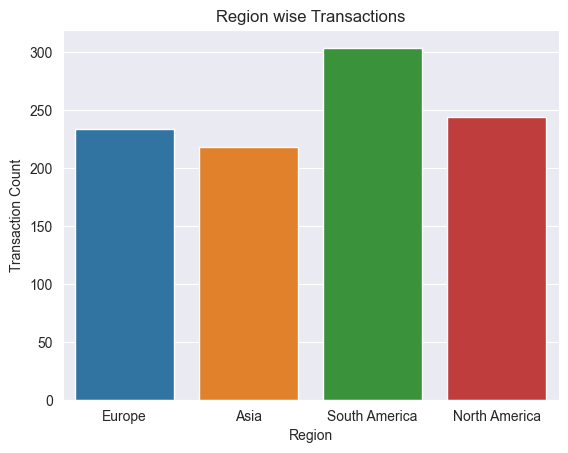

In [38]:
sns.set_style("darkgrid")
sns.countplot(data=ordered_result,x='Region',hue='Region')
plt.title('Region wise Transactions')
plt.ylabel('Transaction Count')
plt.show()

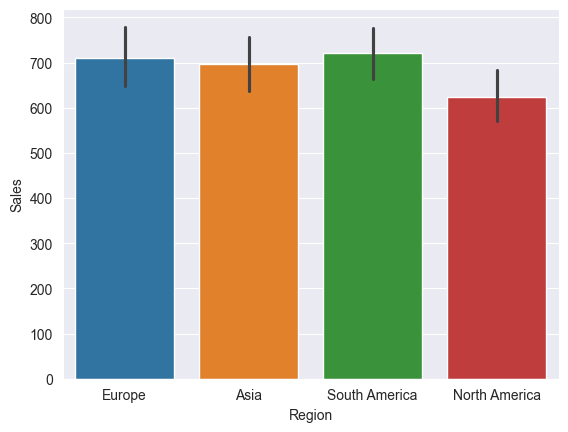

In [39]:
sns.barplot(data=ordered_result,x="Region",y='TotalValue',hue='Region')
plt.ylabel("Sales")
plt.show()

#### >As we can clearly infer that the no. of transactions in "South America" is the highest followed by "North America"
#### >"South America" has done the highest sales

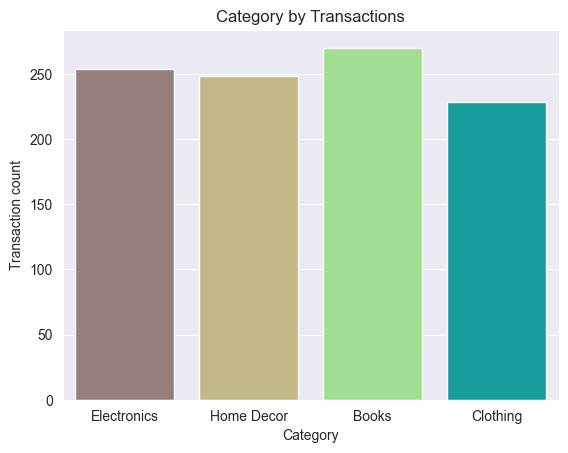

In [40]:
sns.countplot(data=ordered_result,x='Category',hue='Category',palette='terrain_r')
plt.title("Category by Transactions")
plt.ylabel("Transaction count")
plt.show()

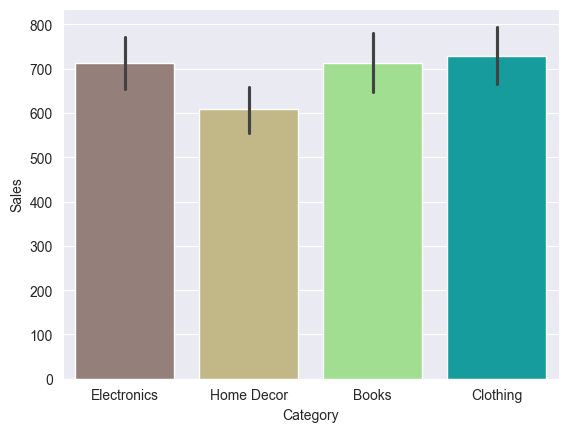

In [41]:
sns.barplot(data=ordered_result,x="Category",y='TotalValue',hue='Category',palette='terrain_r')
plt.ylabel("Sales")
plt.show()

##### >As we can see the category "Books" have the highest transaction count followed by "Electronics"
##### >The category "Clothing" has the highest sales numbers

In [42]:
quarterly_sales = ordered_result.groupby("Quater")["TotalValue"].sum().reset_index()
print(quarterly_sales)

   Quater  TotalValue
0  2023Q4     3769.52
1  2024Q1   165664.39
2  2024Q2   170817.98
3  2024Q3   205406.88
4  2024Q4   144336.79


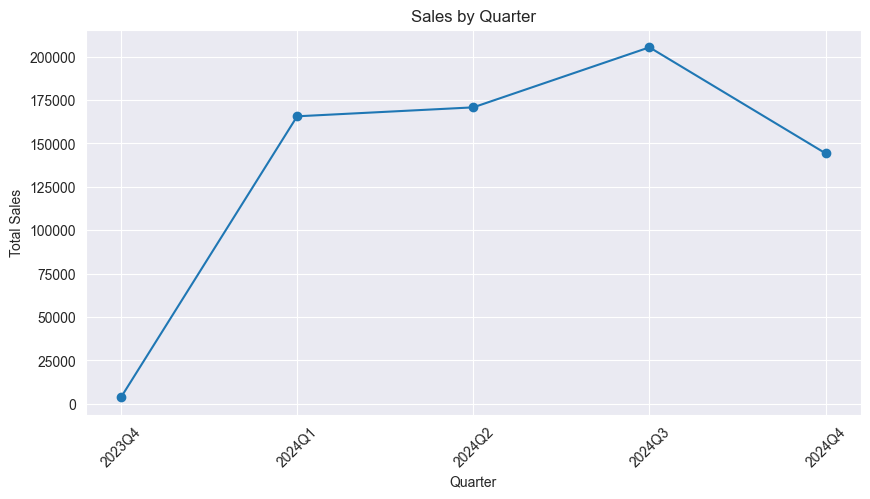

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(quarterly_sales["Quater"].astype(str), quarterly_sales["TotalValue"], marker="o", linestyle="-")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.title("Sales by Quarter")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### >We had the peak sales in the "Third quarter of 2024"

In [44]:
category_sales = ordered_result.groupby(["Quater", "Category"])["TotalValue"].sum().unstack()
category_sales

Category,Books,Clothing,Electronics,Home Decor
Quater,,,,
2023Q4,NaN,1585.36,1870.24,313.92
2024Q1,47679.77,33596.39,40726.04,43662.19
2024Q2,49333.45,44907.97,40065.55,36511.01
2024Q3,52734.24,49959.29,62014.33,40699.02
2024Q4,42400.01,36121.65,36107.34,29707.79


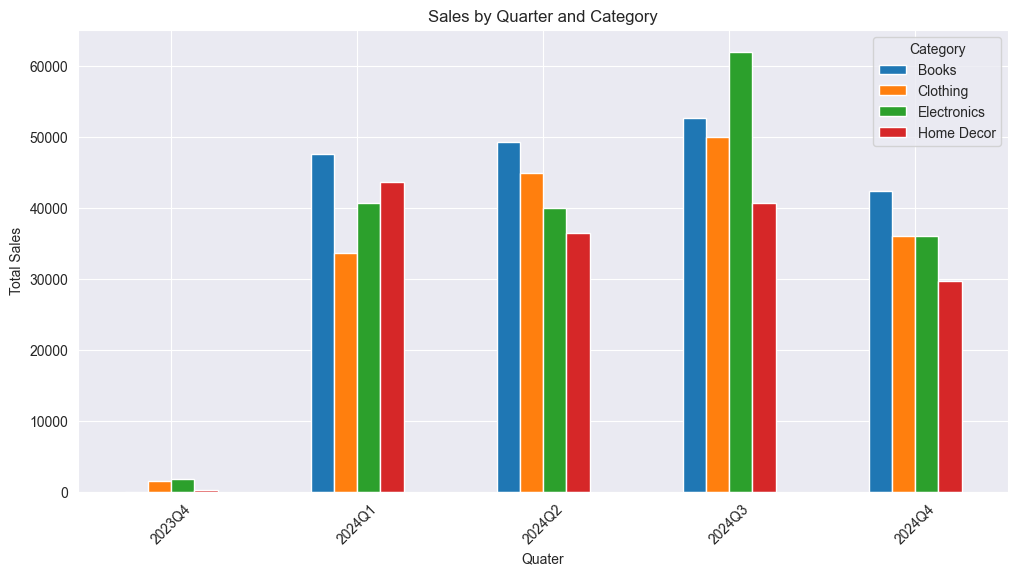

In [45]:
category_sales.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Quater")
plt.ylabel("Total Sales")
plt.title("Sales by Quarter and Category")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

In [46]:
top_customers = ordered_result.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
pd.merge(left=top_customers,right=customers,on='CustomerID')


,CustomerID,TotalValue,CustomerName,Region,SignupDate
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29
2,C0065,7663.70,Gerald Hines,North America,2024-07-10
3,C0156,7634.45,William Adams,North America,2023-08-19
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13
5,C0188,7111.32,Anna Ball,South America,2022-05-17
6,C0059,7073.28,Mrs. Kimberly Wright,North America,2024-04-07
7,C0028,6819.57,Jennifer Pena,Asia,2024-06-29
8,C0099,6715.72,Rodney Eaton,South America,2023-01-29
9,C0165,6708.10,Juan Mcdaniel,South America,2022-04-09


In [47]:
ordered_result['CustomerID'].value_counts().head(10)

C0156    11
C0109    11
C0141    10
C0175    10
C0008    10
C0065    10
C0093     9
C0084     9
C0075     9
C0147     9
Name: CustomerID, dtype: int64

C:\Users\saswa\AppData\Local\Temp\ipykernel_2156\642384135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


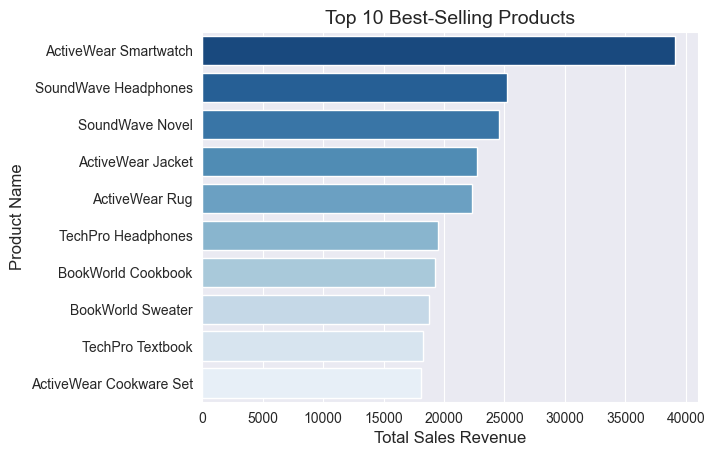

In [48]:
top_products = ordered_result.groupby("ProductName")["TotalValue"].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")

# Labels and Title
plt.xlabel("Total Sales Revenue", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.show()